In [34]:
# import library
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims

In [61]:
# อ่านไฟล์ภาพที่ต้องการนำเข้า Model และปรับขนาดของภาพให้ตรงกับขนาด Input ของโมเดล VGG16
img = load_img(f'bird.jpg', target_size=(224, 224))
original = img

img_mean = [123.68, 116.779, 103.939] #BGR

# แปลงภาพเป็น NumPy array
img_array = np.array(img)

# ดึงค่าสีแต่ละ channel ของ img ออกมา
imgB = img_array[:, :, 0]
imgG = img_array[:, :, 1]
imgR = img_array[:, :, 2]

# นำมาคำนวณค่า img - img_mean ของแต่ละ R,G,B
B = imgB - img_mean[0]
G = imgG - img_mean[1]
R = imgR - img_mean[2]

# รวมแต่ละ channel กลับเป็นรูปเหมือนเดิม
new_img = cv2.merge([B, G, R])


In [66]:
# เพิ่ม dimension
img4d = expand_dims(new_img, axis=0)
img4d.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'New Image')

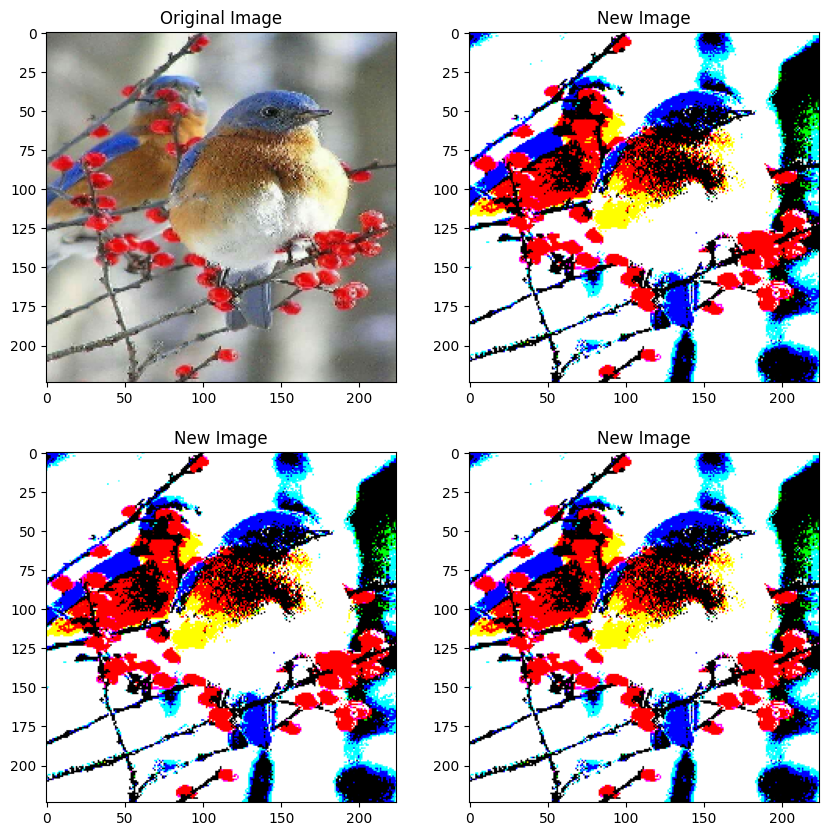

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# แสดงภาพ Original
axes[0,0].imshow(original)
axes[0,0].set_title('Original Image')

# แสดงภาพ new image
axes[0,1].imshow(new_img)
axes[0,1].set_title('New Image')
# แสดงภาพ new image
axes[1,0].imshow(new_img)
axes[1,0].set_title('New Image')
# แสดงภาพ new image
axes[1,1].imshow(new_img)
axes[1,1].set_title('New Image')